## Observations and Insights 

Capomulin and Ramicane are the most effective drugreigmens in reducing the size of the tumors. 
    
Capomulin and Ramicane had the greatest number of timepoints throughout the study, highlighting the sample size of the group and the effectiveness of the treatment over time.
    
There are more male mice per timepoints than female so it's interesting to note whether more females dies during the course of the study.
    

# Imports

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
df_combo = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
df_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
df_combo.shape

(1893, 8)

In [6]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
df_combo.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


# Data Clean (Dropping Bad Mouse)

In [8]:
total_mice = df_combo["Mouse ID"].nunique()
total_mice

249

In [9]:
# Checking the number of mice.
df_combo["Mouse ID"].value_counts()

g989    13
l471    10
m957    10
a444    10
c766    10
        ..
t573     1
b447     1
x336     1
v199     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
# Get duplicate mice by ID number that shows up for Mouse ID and Timepoint.
sum(df_combo.duplicated(subset=["Mouse ID", "Timepoint"]))

5

In [11]:
mask = df_combo.duplicated(subset=["Mouse ID", "Timepoint"])
df_combo.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
df_combo.iloc[860:874, :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
#we don't know measurement truth, and don't want to bias dataset
#drop mouse
mask2 = df_combo["Mouse ID"] !="g989"
df_clean = df_combo.loc[mask2].reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [14]:
df_clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [15]:
# Checking the number of mice in the clean DataFrame.
df_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [16]:
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [17]:
#groupby
drug_groups = df_clean.groupby("Drug Regimen")

#get columns
average_tumor_volume = drug_groups["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_groups["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_groups["Tumor Volume (mm3)"].var()
standarad_deviation_tumor_volume = drug_groups["Tumor Volume (mm3)"].std()
standard_error_tumor_volume = drug_groups["Tumor Volume (mm3)"].sem()

#create DataFrame
summary_table = pd.DataFrame()
summary_table ["Average Tumor Volume"] = average_tumor_volume
summary_table ["Median Tumor Volume"] = median_tumor_volume
summary_table ["Variance of Tumor Volume"] = variance_tumor_volume
summary_table ["Standard Deviation of Tumor Volume"] = standarad_deviation_tumor_volume
summary_table ["Standard Error of Tumor Volume"] = standard_error_tumor_volume

#print DataFrame
summary_table

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_groups.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [19]:
drug_groups["Mouse ID"].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [20]:
drug_groups.size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [21]:
df_clean["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

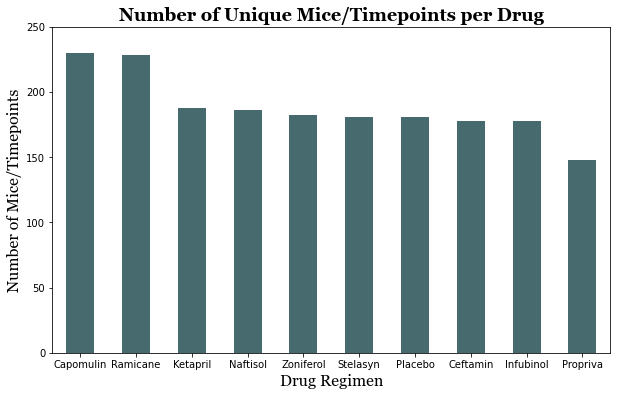

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Figsize
plt.figure(figsize=(10,6))

#Rawplot
df_clean["Drug Regimen"].value_counts().plot(kind = "bar", color="#476A6F", ylim=(0,250))

#Add chart title and labels
plt.xticks(rotation =0, horizontalalignment="center")
plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Georgia")
plt.xlabel('Drug Regimen', fontsize=16, fontname="Georgia")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="Georgia")

plt.show()

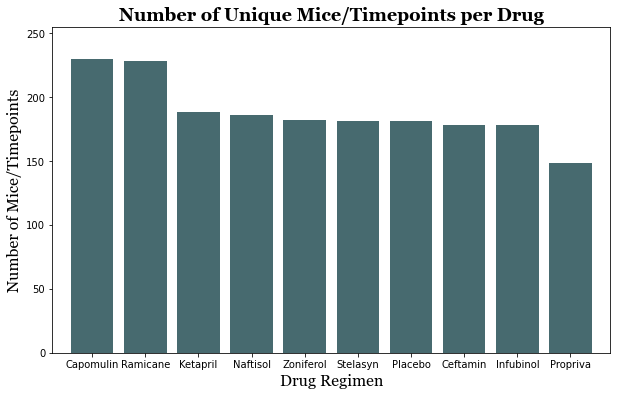

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data = df_clean["Drug Regimen"].value_counts()

x = data.index
y = data.values

#Figsize
plt.figure(figsize=(10,6))

#Raw plot
plt.bar(x, y, color="#476A6F", align="center")

# Sets the limits of the current chart
plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(y)+25)

#Give chart title and labels
plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Georgia")
plt.xlabel('Drug Regimen', fontsize=16, fontname="Georgia")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="Georgia")

#Show
plt.show()

In [24]:
df_clean.groupby("Sex")["Mouse ID"].count()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

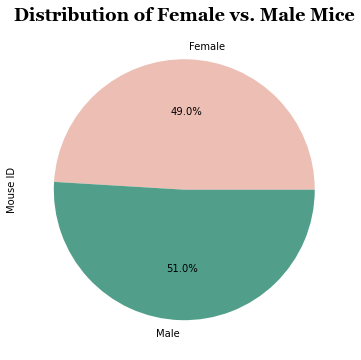

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Raw plot
plot = df_clean.groupby("Sex")["Mouse ID"].count().plot.pie(y='Mouse ID', figsize=(10, 6), colors=("#ECBEB4","#519E8A"), autopct='%1.1f%%')

#Title
plt.title("Distribution of Female vs. Male Mice", fontsize=18, fontweight="bold", fontname="Georgia")

#Show
plt.show()

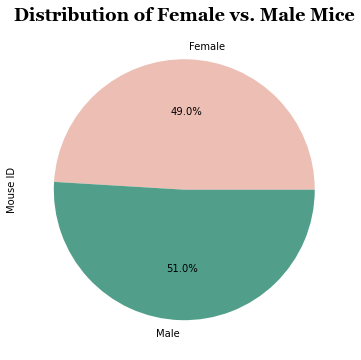

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["#ECBEB4","#519E8A"]

#Figsize
plt.figure(figsize=(10,6))

#Raw plot
df_clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie", colors = colors, autopct='%1.1f%%')

#Title
plt.title("Distribution of Female vs. Male Mice", fontsize=18, fontweight="bold", fontname = "Georgia")

#Show
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_final = df_clean.loc[df_clean["Drug Regimen"].isin(regimens)].reset_index(drop=True)
df_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
max_mouse = df_final.groupby("Mouse ID").Timepoint.max().reset_index()
max_mouse

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [30]:
df_regimen = df_final.merge(max_mouse, on=["Mouse ID", "Timepoint"])
df_regimen.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [31]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile of tumor volumes is: {lowerq}")
    print(f"The upper quartile of tumor volumes is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")
    print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)

Capomulin

The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

The lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The the median of tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The the median of tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

The lowe

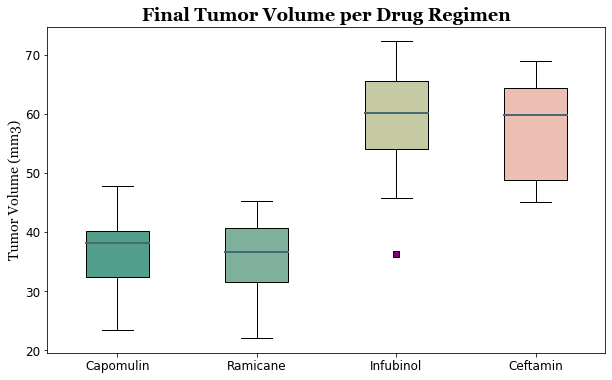

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(10,6))

box = plt.boxplot(drug_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], patch_artist=True)

colors = ['#519E8A', '#7EB09B', '#C5C9A4', '#ECBEB4']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='#476A6F', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='s', markerfacecolor='purple', color='black', alpha=1)

plt.title('Final Tumor Volume per Drug Regimen', fontsize=18, fontweight="bold", fontname = "Georgia")
plt.ylabel('Tumor Volume (mm3)', fontsize=14, fontname = "Georgia")
plt.tick_params(labelsize=12)

plt.show()

## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse=df_clean.loc[df_clean['Mouse ID'] == "y793"].reset_index(drop=True)
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,y793,0,45.000000,0,Capomulin,Male,17,17
1,y793,5,41.019913,0,Capomulin,Male,17,17
2,y793,10,41.630010,1,Capomulin,Male,17,17
3,y793,15,42.283665,1,Capomulin,Male,17,17
4,y793,20,40.716428,2,Capomulin,Male,17,17
5,y793,25,38.992734,2,Capomulin,Male,17,17
6,y793,30,35.726023,2,Capomulin,Male,17,17
7,y793,35,36.327870,2,Capomulin,Male,17,17
8,y793,40,31.475411,2,Capomulin,Male,17,17
9,y793,45,31.896238,2,Capomulin,Male,17,17


<Figure size 720x432 with 0 Axes>

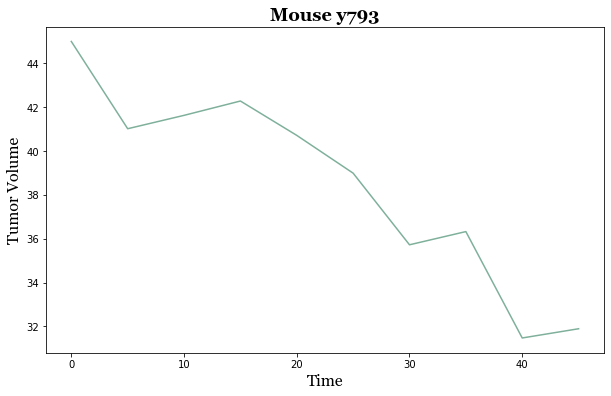

In [34]:
#Figsize
plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

#Raw plot
plt.figure(figsize=(10,6))
plt.plot(x,y, color ="#7EB09B" )

#Title and labels
plt.title ("Mouse y793", fontsize = 18, fontweight = "bold", fontname = "Georgia")
plt.xlabel("Time", fontsize = 16, fontname = "Georgia")
plt.ylabel("Tumor Volume", fontsize = 16, fontname = "Georgia")

#Show
plt.show()

In [35]:
# pull from bar chart
weight_tumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
weight_tumor_df.head()

<ipython-input-35-5d0b09aa898c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weight_tumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [36]:
weight_tumor_df["Tumor Volume (mm3)"].mean()

40.75548707585

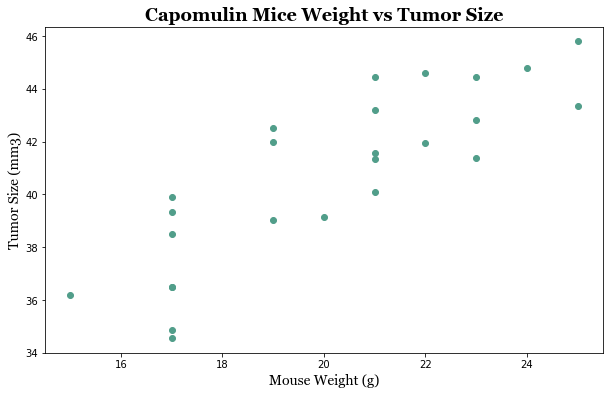

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Figsize
plt.figure(figsize=(10,6))

#Raw plot
plt.scatter(weight_tumor_df["Weight (g)"], weight_tumor_df["Tumor Volume (mm3)"], color = "#519E8A")

#Title and labels
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Georgia")
plt.xlabel("Mouse Weight (g)", fontsize=14, fontname = "Georgia")
plt.ylabel("Tumor Size (mm3)", fontsize=14, fontname = "Georgia")

#Show
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [39]:
weight_tumor_df.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [40]:
feature = weight_tumor_df["Weight (g)"]
target = weight_tumor_df["Tumor Volume (mm3)"]

In [41]:
 # STATSMODELS
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           1.32e-07
Time:                        19:01:54   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.000      16.192      26.912
Weight (g)     0.9544      0.128      7.483      0.000       0.691       1.218
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.951
Skew:                          -0.025   Prob(JB):                        0.622
Kurtosis:                       2.046   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.95x + 21.55'

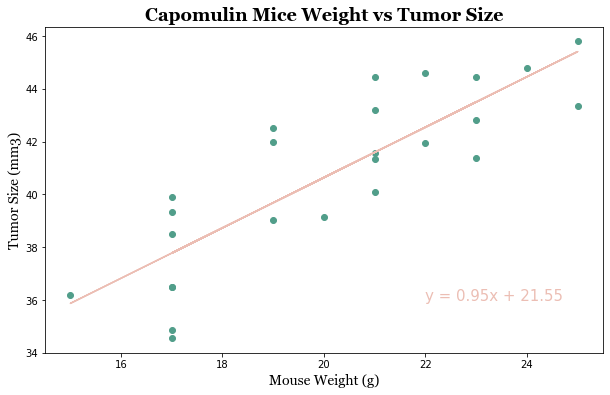

In [43]:
#Fig size
plt.figure(figsize=(10,6))

#Raw plot
plt.scatter(feature, target, color = "#519E8A")
plt.plot(feature, regress_values, color="#ECBEB4")
plt.annotate(line_equation,(22,36),fontsize=15,color="#ECBEB4")

#Title and labels
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Georgia")
plt.xlabel("Mouse Weight (g)", fontsize=14, fontname = "Georgia")
plt.ylabel("Tumor Size (mm3)", fontsize=14, fontname = "Georgia")

#Show
plt.show()